# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

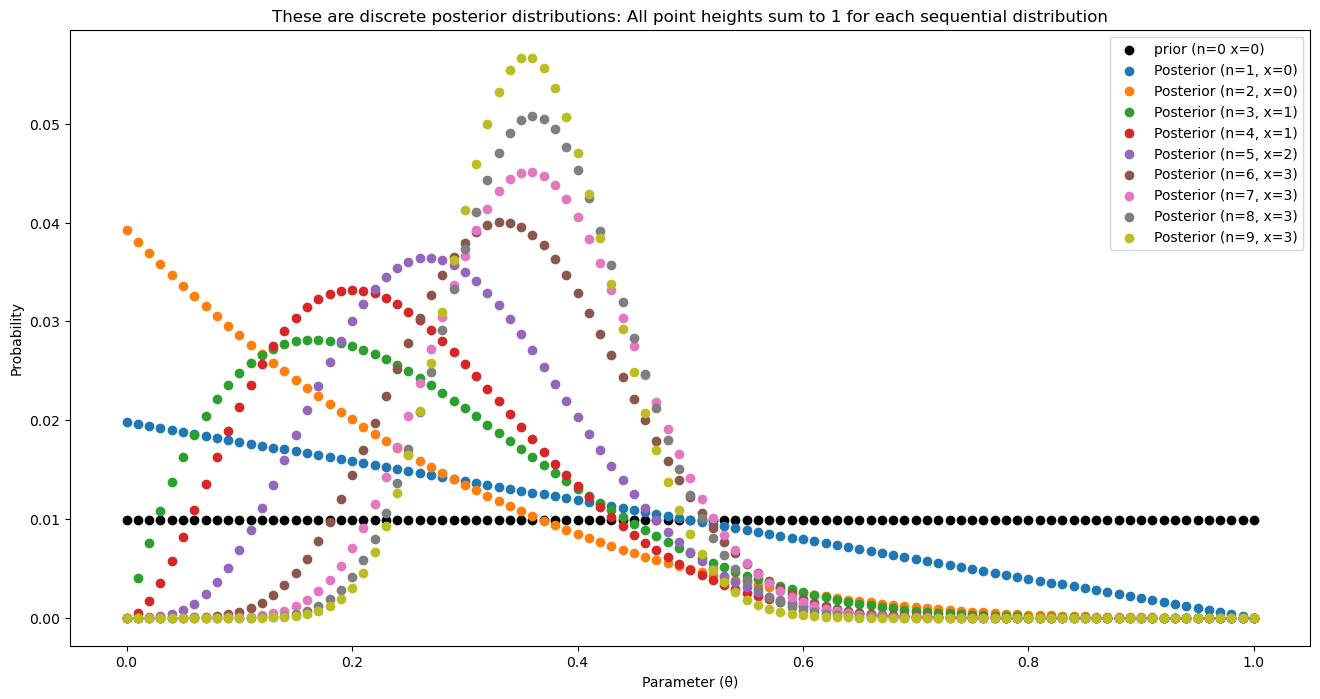

In [1]:
# Q1

import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    
    likelihood = binom.pmf(x, n, parameter_domain)
    posterior = likelihood * prior  # Combine prior and likelihood
    posterior /= posterior.sum()  # Normalize to ensure it sums to 1
    
    plt.scatter(parameter_domain, posterior, label=f"Posterior (n={n}, x={x})")
    
    prior = posterior

# Legend and labels
plt.xlabel("Parameter (θ)")
plt.ylabel("Probability")
plt.legend()
plt.show()

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data

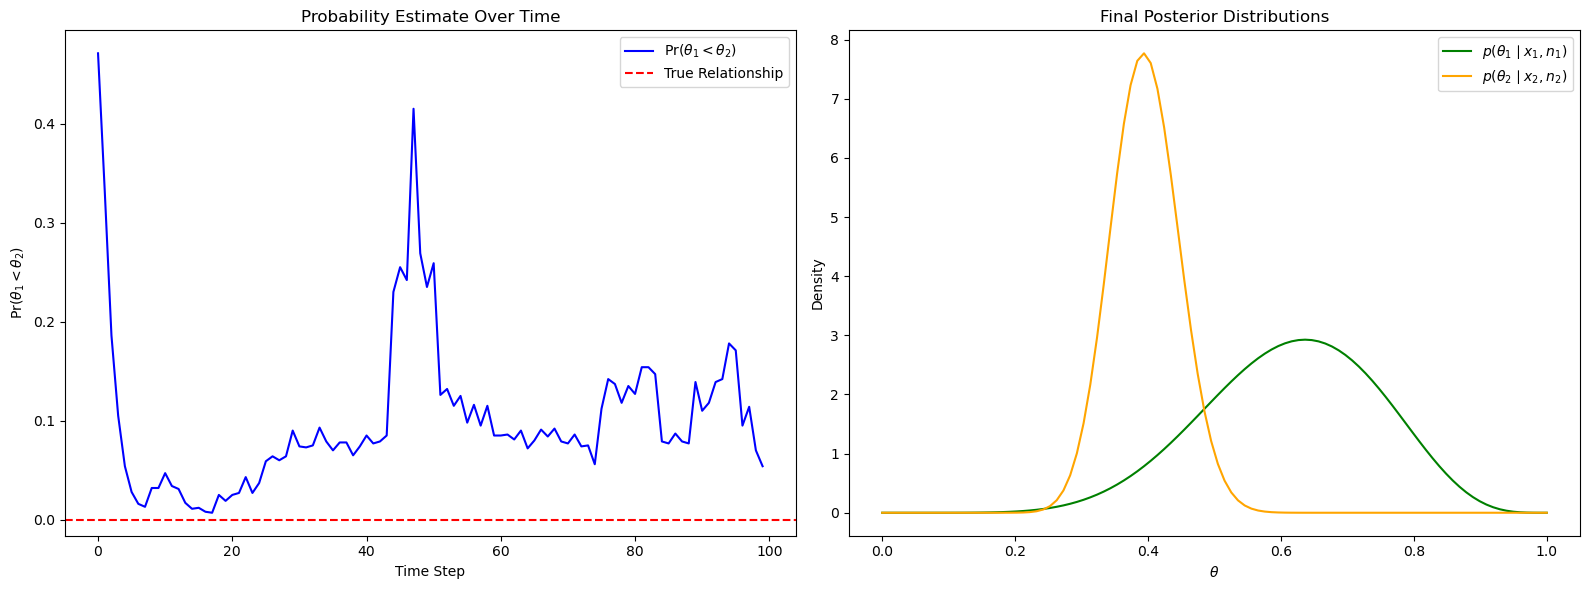

In [3]:
#Q2

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Example True parameters
theta1_true = 0.6
theta2_true = 0.4

# 1. What Distribution?
# Answer: priors, beta distribution -> (Beta(1, 1) = uniform prior ) 
alpha1, beta1 = 1, 1
alpha2, beta2 = 1, 1

# Number of iterations (time steps)
T = 100
samples = 1000 

# Store posterior parameters and probabilities
posterior_theta1 = []
posterior_theta2 = []
prob_theta1_lt_theta2 = []

# Simulate Bayesian multi-armed bandit
for t in range(T):
    # Monte Carlo sampling
    theta1_samples = np.random.beta(alpha1, beta1, samples)
    theta2_samples = np.random.beta(alpha2, beta2, samples)
    prob = np.mean(theta1_samples < theta2_samples)
    prob_theta1_lt_theta2.append(prob)
    
    # Flip coin to decide which "arm" to pull (explore or exploit)
    if np.random.rand() < prob:  # Explore/Exploit
        flip = np.random.rand() < theta1_true  # Coin flip for theta1
        alpha1 += flip
        beta1 += 1 - flip
    else:
        flip = np.random.rand() < theta2_true  # Coin flip for theta2
        alpha2 += flip
        beta2 += 1 - flip
    
    posterior_theta1.append((alpha1, beta1))
    posterior_theta2.append((alpha2, beta2))

# Visualize the learning process
plt.figure(figsize=(16, 6))

# Plot evolution of Pr(theta1 < theta2)
plt.subplot(1, 2, 1)
plt.plot(prob_theta1_lt_theta2, label=r"$\Pr(\theta_1 < \theta_2)$", color='b')
plt.axhline(1 * (theta1_true < theta2_true), linestyle='--', color='r', label="True Relationship")
plt.title("Probability Estimate Over Time")
plt.xlabel("Time Step")
plt.ylabel(r"$\Pr(\theta_1 < \theta_2)$")
plt.legend()

# Plot final posterior distributions
x = np.linspace(0, 1, 100)
plt.subplot(1, 2, 2)
plt.plot(x, beta.pdf(x, alpha1, beta1), label=r"$p(\theta_1 \mid x_1, n_1)$", color='g')
plt.plot(x, beta.pdf(x, alpha2, beta2), label=r"$p(\theta_2 \mid x_2, n_2)$", color='orange')
plt.title("Final Posterior Distributions")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()


### Q3 Answer

Analysis 1: 
In this approach, each of the three entities is analyzed independently using a Beta-Binomial model. Each entity has its own posterior distribution where the method treats all entities as independent, meaning no information is shared between entities during inference.

Analysis 2:
In this approach, the data for all three entities is analyzed jointly using a Dirichlet-Multinomial model. A single Dirichlet prior is placed over the success probabilities where the method assumes that the entities are related, using shared information to make inferences.

To me, the most appropriate approach would be Analysis 2. This is because it allows us to model the relationships between entities by using a shared prior, making it more efficient in scenarios where data is sparse or where the entities share underlying characteristics. Unlike Analysis 1, which treats each entity independently, the Dirichlet-Multinomial approach gathers information across entities, enabling the algorithm to learn faster and make better decisions earlier. This is useful in real-world AB testing contexts where data collection can be slow or costly, as it reduces the need for large amounts of data for each entity to make reliable inferences.

For example, a scenario where you are testing three advertisements targeted at the same audience. Each advertisement differs slightly in messaging or visuals but aims for the attention of the same users. Since the advertisements share the same audience, their performance is likely influenced by similar user preferences. Using Analysis 2, the Dirichlet-Multinomial model can capture this shared relationship, allowing the algorithm to share information between the campaigns and make more efficient use of the available data. Early on, when data is sparse to ensure that the algorithm can still identify promising campaigns without prematurely discarding potentially effective ones. As more data is collected, the algorithm balances exploration (gathering data on under-tested campaigns) and exploitation (focusing on the current best-performing campaign) more effectively than independent analysis.